###Import of Libraries

In [23]:
import pandas as pd
import io
from google.colab import files

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.manifold import Isomap
from sklearn.preprocessing import MinMaxScaler

In [2]:
uploaded = files.upload()

Saving crabs.csv to crabs.csv


### Initial Study of the Dataset

In [3]:
crabs_data = pd.read_csv("crabs.csv")
# Rename the columns
crabs_data = crabs_data.rename(columns={'sp':'species','FL':'Frontal Lobe','RW':'Rear Width','CL':'Carapace Midline',
                                        'CW':'Maximum Width','BD':'Body Depth'})

crabs_data['species'] = crabs_data['species'].map({'B':'Blue','O':'Orange'})
crabs_data['sex'] = crabs_data['sex'].map({'M':'Male','F':'Female'})


In [4]:
crabs_data.describe()

,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000
mean,25.500000,15.583000,12.73850,32.105500,36.414500,14.030500
std,14.467083,3.495325,2.57334,7.118983,7.871955,3.424772
min,1.000000,7.200000,6.50000,14.700000,17.100000,6.100000
25%,13.000000,12.900000,11.00000,27.275000,31.500000,11.400000
50%,25.500000,15.550000,12.80000,32.100000,36.800000,13.900000
75%,38.000000,18.050000,14.30000,37.225000,42.000000,16.600000
max,50.000000,23.100000,20.20000,47.600000,54.600000,21.600000


In [5]:
crabs_data.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2


The goal is to separate the 200 crabs into four classes, given by the 2x2 configurations for sex (male/female) and species (blue/orange).

In [6]:
crabs_data['class'] = crabs_data.species + crabs_data.sex

data_columns = ['Frontal Lobe','Rear Width','Carapace Midline','Maximum Width','Body Depth']

## ISOMAP
This model tries to maintain the geodesic distances between all points. Geodesic distance is the shortest distance between two points on a surface. If the surface is a plane it would be equal to the Euclidean distance.

This method projects the data into a lower dimensional space trying to preserve the **distances** between neighbors (geodesic distance).

So, this method is based on local distances. When we work with distances it is **important that all variables have the same range**. Otherwise, a variable with large values could confuse the model.


### Scale


In [7]:
crabs_min_max = crabs_data.copy()
crabs_min_max[data_columns] = MinMaxScaler().fit_transform(crabs_data[data_columns])

crabs_min_max.describe()

,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,25.500000,0.527233,0.455365,0.529043,0.515053,0.511645
std,14.467083,0.219832,0.187835,0.216382,0.209919,0.220953
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,0.358491,0.328467,0.382219,0.384000,0.341935
50%,25.500000,0.525157,0.459854,0.528875,0.525333,0.503226
75%,38.000000,0.682390,0.569343,0.684650,0.664000,0.677419
max,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2D

Reconstruction error: 0.009501240251169362


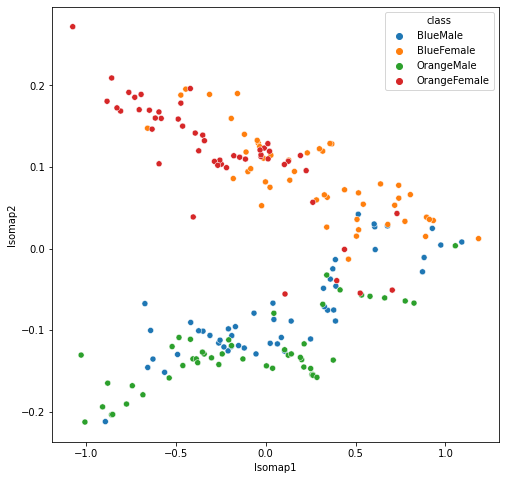

In [8]:
isomap = Isomap(n_components=2,n_neighbors=10)
crabs_isomap = isomap.fit_transform(crabs_min_max[data_columns])

# Add components to the data set
crabs_min_max[['Isomap1','Isomap2']] = crabs_isomap

print('Reconstruction error:', isomap.reconstruction_error())
fig = plt.figure(figsize=(8,8))
sns.scatterplot(x='Isomap1',y='Isomap2',hue='class',data=crabs_min_max)

In [9]:
crabs_min_max.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class,Isomap1,Isomap2
0,Blue,Male,1,0.056604,0.014599,0.042553,0.050667,0.058065,BlueMale,1.091359,0.008030
1,Blue,Male,2,0.100629,0.087591,0.103343,0.098667,0.083871,BlueMale,0.974560,0.004326
2,Blue,Male,3,0.125786,0.094891,0.130699,0.141333,0.103226,BlueMale,0.927329,0.024731
3,Blue,Male,4,0.150943,0.102190,0.164134,0.160000,0.135484,BlueMale,0.881710,-0.010955
4,Blue,Male,5,0.163522,0.109489,0.170213,0.157333,0.135484,BlueMale,0.872720,-0.028483


## 3D

Reconstruction error: 0.007640087707465774


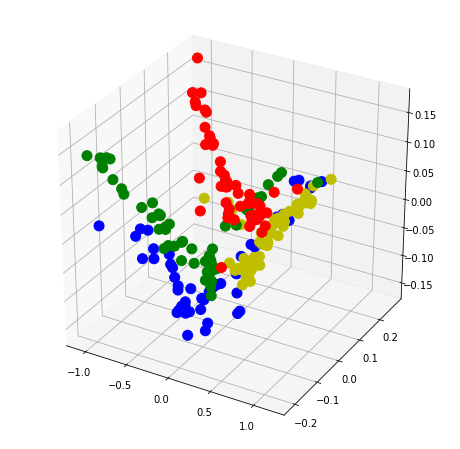

In [22]:
isomap = Isomap(n_components=3,n_neighbors=10)
crabs_isomap = isomap.fit_transform(crabs_min_max[data_columns])

crabs_min_max[['Isomap1','Isomap2','Isomap3']] = crabs_isomap

colors_crabs = {'BlueMale':'b','BlueFemale':'y','OrangeMale':'g','OrangeFemale':'r'}

print('Reconstruction error:', isomap.reconstruction_error())

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')

plt.scatter(crabs_min_max.Isomap1,crabs_min_max.Isomap2,zs=crabs_min_max.Isomap3,depthshade=False,
            c=crabs_min_max['class'].apply(lambda x: colors_crabs[x]),s=100)
            

In [17]:
crabs_min_max.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class,Isomap1,Isomap2,Isomap3
0,Blue,Male,1,0.056604,0.014599,0.042553,0.050667,0.058065,BlueMale,1.091359,0.008030,0.117078
1,Blue,Male,2,0.100629,0.087591,0.103343,0.098667,0.083871,BlueMale,0.974560,0.004326,0.106429
2,Blue,Male,3,0.125786,0.094891,0.130699,0.141333,0.103226,BlueMale,0.927329,0.024731,0.094621
3,Blue,Male,4,0.150943,0.102190,0.164134,0.160000,0.135484,BlueMale,0.881710,-0.010955,0.117162
4,Blue,Male,5,0.163522,0.109489,0.170213,0.157333,0.135484,BlueMale,0.872720,-0.028483,0.120854


### Plotly Express

In [24]:
fig = px.scatter_3d(crabs_min_max,x='Isomap1',y='Isomap2',z='Isomap3',color='class')
fig.show()